In [6]:
import pandas as pd
import numpy as np


In [7]:
# Load the datasets into pandas DataFrames
reaction_types = pd.read_csv(r"C:\Users\ashwi\Downloads\ReactionTypes.csv") 
reactions = pd.read_csv(r"C:\Users\ashwi\Downloads\Reactions.csv") 
content = pd.read_csv(r"C:\Users\ashwi\Downloads\Content.csv") 

In [11]:
# Print all column names for each dataset
print("Columns in Reaction Types dataset:")
print(reaction_types.columns)

print("\nColumns in Reactions dataset:")
print(reactions.columns)

print("\nColumns in Content dataset:")
print(content.columns)

Columns in Reaction Types dataset:
Index(['Unnamed: 0', 'Type', 'Sentiment', 'Score'], dtype='object')

Columns in Reactions dataset:
Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Datetime'], dtype='object')

Columns in Content dataset:
Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Category', 'URL'], dtype='object')


In [8]:
# View the first few rows to understand the structure
print(reaction_types.head())
print(reactions.head())
print(content.head())

# View summary information
print(reaction_types.info())
print(reactions.info())
print(content.info())


   Unnamed: 0        Type Sentiment  Score
0           0       heart  positive     60
1           1        want  positive     70
2           2     disgust  negative      0
3           3        hate  negative      5
4           4  interested  positive     30
   Unnamed: 0                            Content ID  \
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2   
1           1  97522e57-d9ab-4bd6-97bf-c24d952602d2   
2           2  97522e57-d9ab-4bd6-97bf-c24d952602d2   
3           3  97522e57-d9ab-4bd6-97bf-c24d952602d2   
4           4  97522e57-d9ab-4bd6-97bf-c24d952602d2   

                                User ID     Type             Datetime  
0                                   NaN      NaN  2021-04-22 15:17:15  
1  5d454588-283d-459d-915d-c48a2cb4c27f  disgust  2020-11-07 09:43:50  
2  92b87fa5-f271-43e0-af66-84fac21052e6  dislike  2021-06-17 12:22:51  
3  163daa38-8b77-48c9-9af6-37a6c1447ac2   scared  2021-04-18 05:13:58  
4  34e8add9-0206-47fd-a501-037b994650a2  disgust  2

In [9]:
# Drop rows with missing values in each dataset
reaction_types_cleaned = reaction_types.dropna()
reactions_cleaned = reactions.dropna()
content_cleaned = content.dropna()


In [13]:
# Step 1: Check the unique values of the column to understand its data type
print("Unique values in 'Content ID' column of reactions dataset:")
print(reactions['Content ID'].unique())

print("\nUnique values in 'Content ID' column of content dataset:")
print(content['Content ID'].unique())

# Step 2: Skip conversion for non-numeric values
# Option 1: If 'Content ID' is a UUID or string, leave it as is
# reactions_cleaned['Content ID'] = reactions_cleaned['Content ID'].astype(str)
# content_cleaned['Content ID'] = content_cleaned['Content ID'].astype(str)

# Option 2: Remove invalid rows and convert to integer
def safe_convert_to_int(column):
    """Convert column to integer, skipping invalid rows."""
    return pd.to_numeric(column, errors='coerce').dropna().astype(int)

reactions_cleaned['Content ID'] = safe_convert_to_int(reactions_cleaned['Content ID'])
content_cleaned['Content ID'] = safe_convert_to_int(content_cleaned['Content ID'])

# Step 3: Verify the cleaned data
print("Reactions Dataset after cleaning 'Content ID':")
print(reactions_cleaned.head())

print("\nContent Dataset after cleaning 'Content ID':")
print(content_cleaned.head())



Unique values in 'Content ID' column of reactions dataset:
['97522e57-d9ab-4bd6-97bf-c24d952602d2'
 '9f737e0a-3cdd-4d29-9d24-753f4e3be810'
 '230c4e4d-70c3-461d-b42c-ec09396efb3f'
 '356fff80-da4d-4785-9f43-bc1261031dc6'
 '01ab84dd-6364-4236-abbb-3f237db77180'
 'cf1e8c1a-23eb-4426-9f58-002fb1b53e91'
 '3f8590c7-6ab2-4973-805a-90cdec355f05'
 'e5490118-90d5-4572-ab1c-1fbc87b8d9ca'
 '0bedca96-fb76-4287-a83c-17330ed39cce'
 'b18cb63f-4c8e-44ee-a47f-541e95191d11'
 '5118e9c5-1377-4cc5-a486-65b35b7b7b76'
 '46fb701d-6c26-458e-ada3-2ebe5dbba01f'
 '0be59876-d70c-486c-8e0b-a06bef7a2cd6'
 '81abd65a-3b76-4574-a0a7-db6bf7184ae2'
 'e6ee2244-9382-49a9-8cbf-fa54aaaa2392'
 '7ffd0a82-4a0a-4527-a4d6-e251b756bac7'
 'f332d362-dc48-46c2-a64b-641157c0987e'
 'a2e93b29-9259-4092-a4d7-62d5e823bb74'
 '9b3a6d30-48e8-476c-82be-9031524bd04d'
 '850fe90d-47d6-4eb7-b9c8-810afcb99ce9'
 'baa2db00-81ba-4c34-b17d-dd950bfa133b'
 'f98dde71-ce1d-4f6c-bb05-ae05779d2207'
 '388bd9db-9d10-4f47-87c4-6db46e83bc95'
 '78d0075f-895c-4a15-

In [14]:
# Check the cleaned datasets
print(reaction_types_cleaned.head())
print(reactions_cleaned.head())
print(content_cleaned.head())

# Check if there are still missing values or incorrect data types
print(reaction_types_cleaned.info())
print(reactions_cleaned.info())
print(content_cleaned.info())


         Type Sentiment  Score
0       heart  positive   60.0
1        want  positive   70.0
2     disgust  negative    0.0
3        hate  negative    5.0
4  interested  positive   30.0
   Content ID                               User ID     Type  \
0         NaN                                   NaN      NaN   
1         NaN  5d454588-283d-459d-915d-c48a2cb4c27f  disgust   
2         NaN  92b87fa5-f271-43e0-af66-84fac21052e6  dislike   
3         NaN  163daa38-8b77-48c9-9af6-37a6c1447ac2   scared   
4         NaN  34e8add9-0206-47fd-a501-037b994650a2  disgust   

              Datetime  
0  2021-04-22 15:17:15  
1  2020-11-07 09:43:50  
2  2021-06-17 12:22:51  
3  2021-04-18 05:13:58  
4  2021-01-06 19:13:01  
   Content ID                               User ID   Type        Category  \
0         NaN  8d3cd87d-8a31-4935-9a4f-b319bfe05f31  photo        Studying   
1         NaN  beb1f34e-7870-46d6-9fc7-2e12eb83ce43  photo  healthy eating   
2         NaN  a5c65404-5894-4b87-82f2-d787cb

In [15]:
# Save the cleaned datasets to new files
reaction_types_cleaned.to_csv('Reaction_Types_Cleaned.csv', index=False)
reactions_cleaned.to_csv('Reactions_Cleaned.csv', index=False)
content_cleaned.to_csv('Content_Cleaned.csv', index=False)


In [16]:
import os
print(os.getcwd())


c:\Users\ashwi\AppData\Local\Programs\Microsoft VS Code


In [17]:
# Merge Reactions and Content datasets
merged_data = reactions_cleaned.merge(content_cleaned[['Content ID', 'Category']], on='Content ID', how='left')

# Merge the resulting dataset with Reaction Types
final_data = merged_data.merge(reaction_types_cleaned[['Type', 'Score']], on='Type', how='left')


In [18]:
# Calculate total scores for each category
category_scores = final_data.groupby('Category')['Score'].sum().reset_index()

# Sort categories by total score in descending order
top_categories = category_scores.sort_values(by='Score', ascending=False)

# Get the top 5 performing categories
top_5_categories = top_categories.head(5)

print(top_5_categories)


      Category       Score
37  technology  69128795.0
25     animals  65234215.0
39      travel  65234215.0
27     culture  61339635.0
34     science  61339635.0


In [19]:
# Save the final merged dataset
final_data.to_csv('final_cleaned_dataset.csv', index=False)

# Save the top 5 categories
top_5_categories.to_csv('top_5_categories.csv', index=False)


In [29]:
csv_file = r"C:\Users\ashwi\Downloads\final_cleaned_dataset.csv"
df = pd.read_csv(csv_file)


print("\nColumns in Content dataset:")
print(df.columns)


Columns in Content dataset:
Index(['Content ID', 'User ID', 'Type', 'Datetime', 'Category', 'Score'], dtype='object')


In [30]:
csv_file = r"C:\Users\ashwi\Downloads\final_cleaned_dataset.csv"
excel_file = r"C:\Users\ashwi\Downloads\final_cleaned_dataset_split.xlsx"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)
# Optionally filter rows (e.g., only keep first 1 million rows)
df = df.iloc[:1000000]

# Save the reduced DataFrame to Excel
df.to_excel(excel_file, index=False)
print(f"Filtered dataset has been saved to '{excel_file}'.")


Filtered dataset has been saved to 'C:\Users\ashwi\Downloads\final_cleaned_dataset_split.xlsx'.


In [33]:
import pandas as pd

# Load the cleaned dataset
file_path = r"C:\Users\ashwi\Downloads\final_cleaned_dataset.csv"  # Replace with the correct file path
data = pd.read_csv(file_path)

# Preview the data
print(data.head(15))

    Content ID User ID Type             Datetime         Category  Score
0          NaN     NaN  NaN  2021-04-22 15:17:15         Studying    NaN
1          NaN     NaN  NaN  2021-04-22 15:17:15   healthy eating    NaN
2          NaN     NaN  NaN  2021-04-22 15:17:15   healthy eating    NaN
3          NaN     NaN  NaN  2021-04-22 15:17:15       technology    NaN
4          NaN     NaN  NaN  2021-04-22 15:17:15             food    NaN
5          NaN     NaN  NaN  2021-04-22 15:17:15          cooking    NaN
6          NaN     NaN  NaN  2021-04-22 15:17:15             dogs    NaN
7          NaN     NaN  NaN  2021-04-22 15:17:15       technology    NaN
8          NaN     NaN  NaN  2021-04-22 15:17:15           soccer    NaN
9          NaN     NaN  NaN  2021-04-22 15:17:15  public speaking    NaN
10         NaN     NaN  NaN  2021-04-22 15:17:15          science    NaN
11         NaN     NaN  NaN  2021-04-22 15:17:15  public speaking    NaN
12         NaN     NaN  NaN  2021-04-22 15:17:15   

In [34]:
unique_categories = data['Category'].nunique()
print(f"Number of unique categories: {unique_categories}")


Number of unique categories: 41


In [35]:
# Group by category and sum scores
category_scores = data.groupby('Category')['Score'].sum()

# Find the most popular category
most_popular_category = category_scores.idxmax()
most_popular_score = category_scores.max()

print(f"The most popular category is '{most_popular_category}' with {most_popular_score:.0f} reactions.")


The most popular category is 'technology' with 69128795 reactions.


In [36]:
# Convert Datetime column to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Extract the month and year
data['Month'] = data['Datetime'].dt.to_period('M')

# Count posts by month
posts_per_month = data.groupby('Month').size()

# Find the month with the most posts
most_posts_month = posts_per_month.idxmax()
most_posts_count = posts_per_month.max()

print(f"The month with the most posts is '{most_posts_month}' with {most_posts_count} posts.")


The month with the most posts is '2021-01' with 2218000 posts.


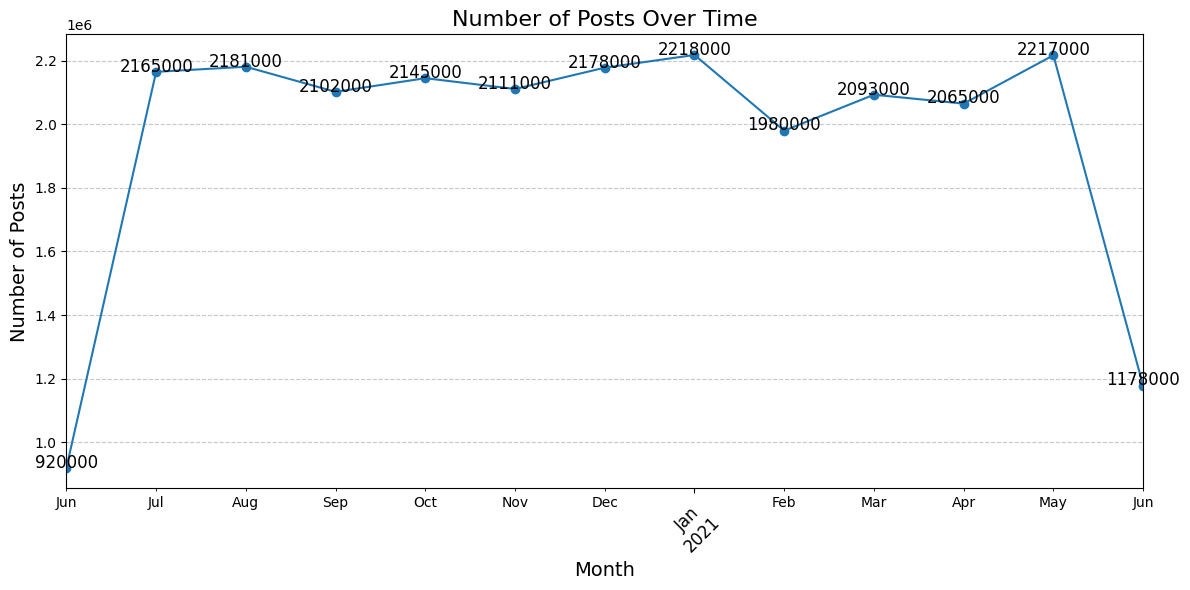

In [47]:
import matplotlib.pyplot as plt

# Example: Line chart data (you should replace this with your actual `posts_per_month` data)
# posts_per_month = ... (Your data here)

# Create the line chart
plt.figure(figsize=(12, 6))
posts_per_month.sort_index().plot(kind='line', marker='o')

# Add title and labels
plt.title('Number of Posts Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# Rotate x-axis labels and customize font size
plt.xticks(rotation=45, fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label each data point
for x, y in zip(posts_per_month.index, posts_per_month.values):
    plt.text(x, y + 500, str(y), ha='center', fontsize=12, color='black')

# Tight layout to ensure everything fits properly
plt.tight_layout()

# Show the plot
plt.show()


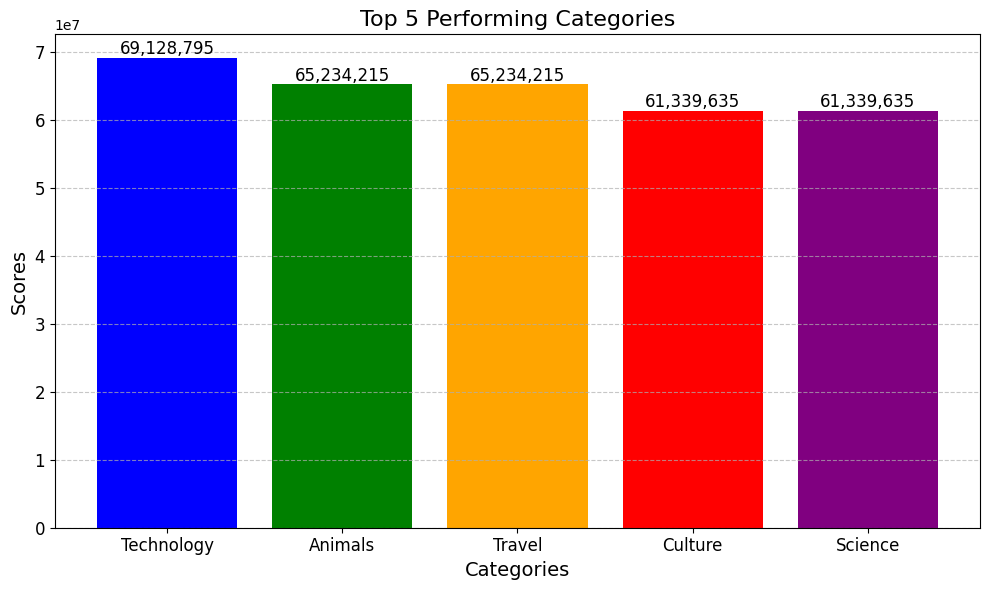

In [38]:
import matplotlib.pyplot as plt

# Data
categories = ['Technology', 'Animals', 'Travel', 'Culture', 'Science']
scores = [69128795.0, 65234215.0, 65234215.0, 61339635.0, 61339635.0]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, scores, color=['blue', 'green', 'orange', 'red', 'purple'])

# Add title and labels
plt.title('Top 5 Performing Categories', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Scores', fontsize=14)

# Add data labels on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score + 500000, f'{int(score):,}', ha='center', fontsize=12)

# Customize ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

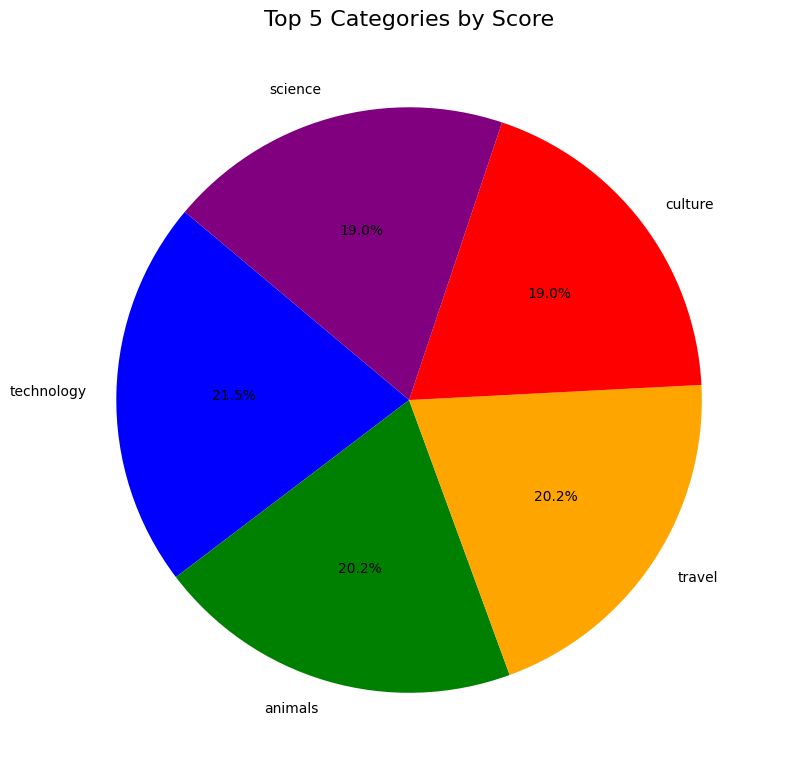

In [42]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Top 5 Categories by Score', fontsize=16)
plt.tight_layout()
plt.show()


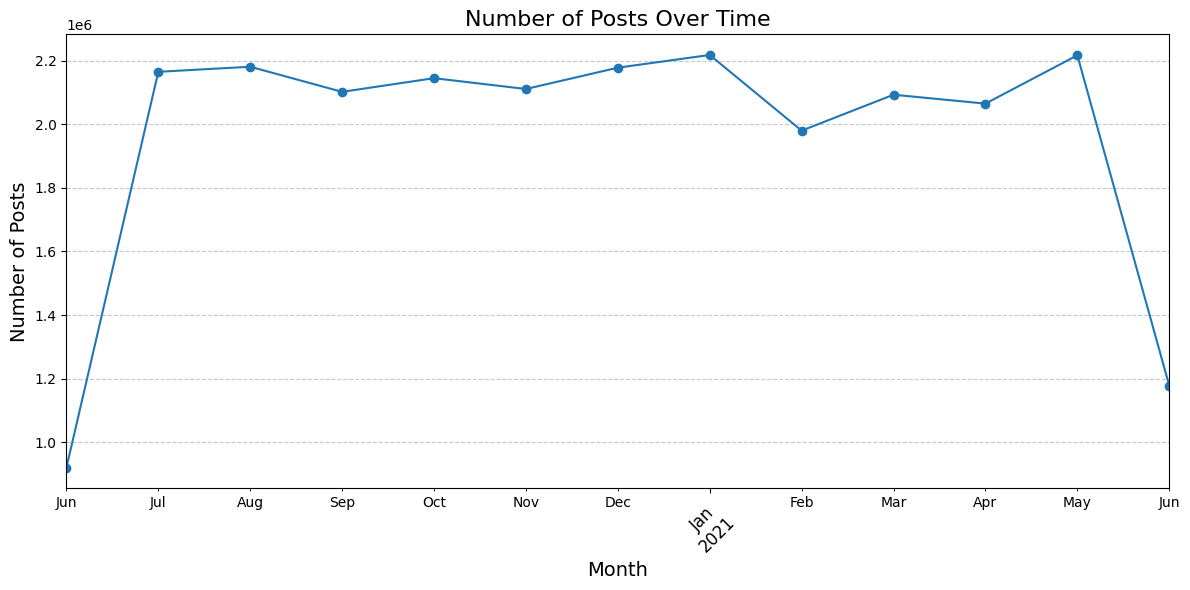

In [40]:
# Line chart
plt.figure(figsize=(12, 6))
posts_per_month.sort_index().plot(kind='line', marker='o')
plt.title('Number of Posts Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd

# Provide the file path to your dataset
file_path = r"C:\Users\ashwi\Downloads\Task 3_Final Content Data set.csv"  # Replace with the correct file path

# Load the dataset
data = pd.read_csv(file_path)

# Print all column names
print("Column names in the dataset:")
print(data.columns.tolist())
print(data)


Column names in the dataset:
['Unnamed: 0', 'Content ID', 'Reaction Type', 'Datetime', 'Content Type', 'Category', 'Sentiment', 'Score']
       Unnamed: 0                            Content ID Reaction Type  \
0               0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
1               1  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike   
2               2  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared   
3               3  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
4               4  97522e57-d9ab-4bd6-97bf-c24d952602d2    interested   
...           ...                                   ...           ...   
24568       24568  75d6b589-7fae-4a6d-b0d0-752845150e56       dislike   
24569       24569  75d6b589-7fae-4a6d-b0d0-752845150e56     intrigued   
24570       24570  75d6b589-7fae-4a6d-b0d0-752845150e56    interested   
24571       24571  75d6b589-7fae-4a6d-b0d0-752845150e56       worried   
24572       24572  75d6b589-7fae-4a6d-b0d0-752845150e56     